In [1]:
%autosave 0
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font",size=22)

Autosave disabled


In [2]:
os.listdir("/data/large03/analysis")

['perf_summary.tex',
 'planning_times_base_tables.csv',
 'planning_times_imputedb.csv',
 'running_times_base_tables.csv',
 'running_times_imputedb.csv']

In [3]:
os.listdir("/data/large04/analysis")

['counts_mean.tex',
 'counts_mean_pct.tex',
 'counts_std.tex',
 'perf_summary.tex',
 'planning_times_base_tables.csv',
 'planning_times_imputedb.csv',
 'running_times_base_tables.csv',
 'running_times_imputedb.csv']

In [4]:
# Load data
def load_data(kind, name, subdir=""):
    df = pd.read_csv(os.path.join("/data", subdir, "{}_{}.csv".format(kind, name)))
    return df

nqueries = 13
running_times_imputedb = load_data("running_times","imputedb","large03/analysis")
running_times_base_tables = load_data("running_times","base_tables","large03/analysis")

In [5]:
running_times_base_tables.head()

,Unnamed: 0,query,alpha,mean,std
0,0,0.0,Impute at base tables,6547.945,24.885506
1,1,1.0,Impute at base tables,10661.390,33.137719
2,2,2.0,Impute at base tables,10672.580,31.472467
3,3,3.0,Impute at base tables,10679.545,30.605415
4,4,4.0,Impute at base tables,15951.700,51.275294


In [6]:
running_times_imputedb.head()

,Unnamed: 0,query,alpha,mean,std
0,0,0.0,0.0,625.930,13.817733
1,1,0.0,1.0,14.120,1.580535
2,2,1.0,0.0,424.245,7.852598
3,3,1.0,1.0,19.280,0.857483
4,4,2.0,0.0,48.955,3.997861


In [14]:
# Combine dataframes.
running_times_combined = running_times_base_tables.append(running_times_imputedb)
running_times_combined_copy = running_times_combined.copy()

In [8]:
running_times_combined.head()

,Unnamed: 0,query,alpha,mean,std
0,0,0.0,Impute at base tables,6547.945,24.885506
1,1,1.0,Impute at base tables,10661.390,33.137719
2,2,2.0,Impute at base tables,10672.580,31.472467
3,3,3.0,Impute at base tables,10679.545,30.605415
4,4,4.0,Impute at base tables,15951.700,51.275294


In [23]:
# Rename certain queries
qmap1 = {
    10.0: 1.0,
    2.0: 2.0,
    3.0: 3.0,
    4.0: 4.0,
    9.0: 5.0,
    11.0: 6.0,
    6.0: 7.0,
    7.0: 8.0,
    8.0: 9.0,
}
qmap = {}
for k, v in qmap1.items():
    qmap[k-1] = v-1
    
qmap

{1.0: 1.0,
 2.0: 2.0,
 3.0: 3.0,
 5.0: 6.0,
 6.0: 7.0,
 7.0: 8.0,
 8.0: 4.0,
 9.0: 0.0,
 10.0: 5.0}

In [24]:
running_times_combined = pd.DataFrame(columns=running_times_combined_copy.columns)
for index, row in running_times_combined_copy.iterrows():
    old_query = row["query"]
    if old_query in qmap:
        new_query = qmap[old_query]
        row["query"] = new_query
        running_times_combined = running_times_combined.append(row)

running_times_combined.head()

,Unnamed: 0,query,alpha,mean,std
1,1.0,1.0,Impute at base tables,10661.390,33.137719
2,2.0,2.0,Impute at base tables,10672.580,31.472467
3,3.0,3.0,Impute at base tables,10679.545,30.605415
5,5.0,6.0,Impute at base tables,15939.515,52.049356
6,6.0,7.0,Impute at base tables,15943.120,48.904949


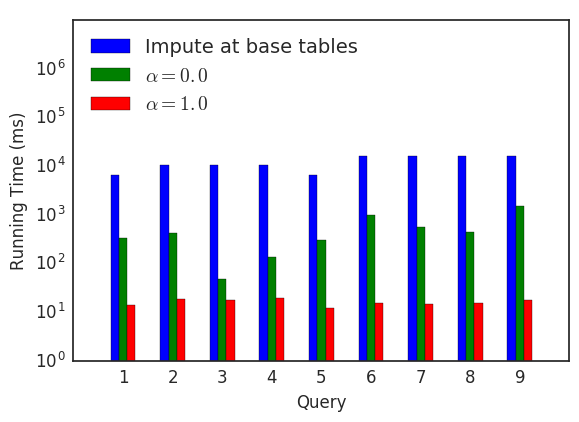

In [26]:
name = "combined"
kind = "running_times"
df = running_times_combined

# plots
xticks = range(0, nqueries)
xlabels = ["%i" % (q + 1) for q in xticks]

plt.figure()

df2 = df.copy()
df2 = df2.pivot(index="query",columns="alpha",values="mean")
df2 = df2[["Impute at base tables",0.0,1.0]]
df2 = df2.rename(columns={0.0: r"$\alpha = 0.0$", 1.0: r"$\alpha=1.0$"})
ax = df2.plot(kind="bar")
ax.set_yscale("log")
ax.set_ylim(bottom=0.99, top=10e6-0.1)
ax.legend(title=None,loc="upper left", fontsize=14)

xticks = range(0, len(df2))
xlabels = ["%i" % (q + 1) for q in xticks]
plt.xlim(xticks[0] - 1, xticks[-1] + 1)
plt.xticks(xticks, xlabels,rotation=0)

plt.xlabel('Query')
plt.ylabel("Running Time (ms)")

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
    
plt.savefig(os.path.join("/data/large03", '{}_{}_bar_subset.png'.format(kind, name)),bbox_inches='tight')

In [27]:
df2

alpha,Impute at base tables,$\alpha = 0.0$,$\alpha=1.0$
query,,,
0.0,6571.260,337.320,13.900
1.0,10661.390,424.245,19.280
2.0,10672.580,48.955,18.120
3.0,10679.545,138.750,19.305
4.0,6557.520,305.760,12.235
5.0,15944.430,979.155,15.740
6.0,15939.515,561.410,14.580
7.0,15943.120,453.115,15.710
8.0,15947.055,1497.150,17.930


In [29]:
df2.to_csv(os.path.join("/data/large03",'{}_{}_bar_subset.csv'.format(kind, name)))